In [8]:
#Exploratory data analysis
# package pandas
import pandas as pd
%pylab inline
import os #directory path change/view current directory

#current working directory
os.getcwd()
os.chdir('/home/harish/PycharmProjects/Kaggle')
os.getcwd()

#train dataset
dataframe = pd.read_csv("train.csv")
dataframe.head(5)




Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
%quickref


In [10]:
%timeit os.getcwd()


The slowest run took 107.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 321 ns per loop


In [2]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#fill the missing value
dataframe['Age'].fillna(dataframe['Age'].median(), inplace = True)
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
%magic

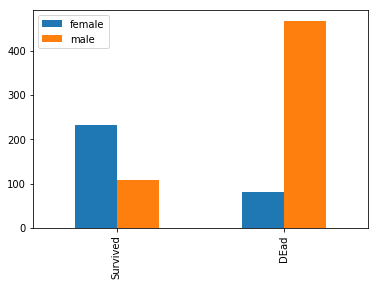

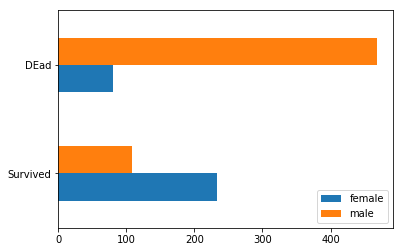

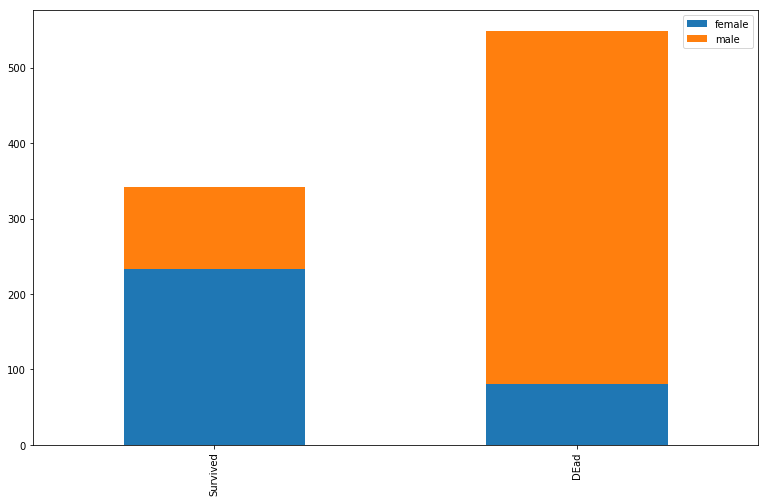

In [4]:
survived_sex = dataframe[dataframe['Survived']==1]['Sex'].value_counts()
survived_sex
dead_sex = dataframe[dataframe['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])

df.index = ['Survived','DEad']
df.head()
df.plot(kind='bar')
df.plot(kind='barh')
df.plot(kind='bar', stacked=True, figsize=(13,8))

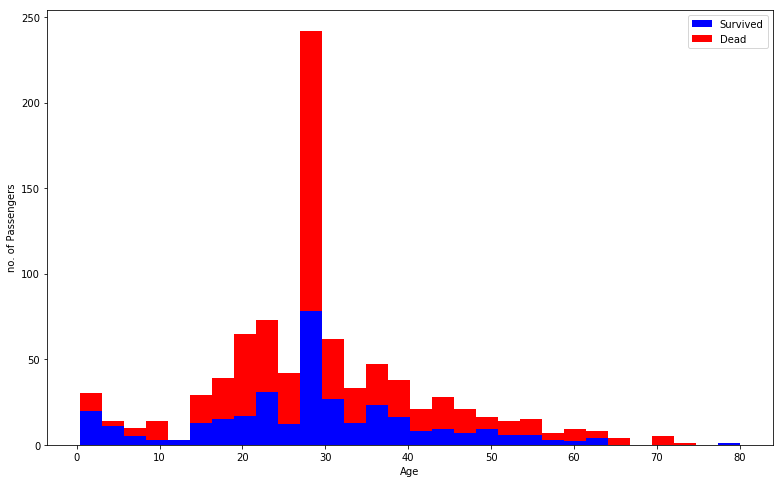

In [5]:
#Age correlation
figure = plt.figure(figsize=(13,8))
plt.hist([dataframe[dataframe['Survived']==1]['Age'],dataframe[dataframe['Survived']==0]['Age']], 
         color=['b','r'], bins=30, label=['Survived','Dead'],stacked=True)
plt.xlabel('Age')
plt.ylabel('no. of Passengers')
plt.legend()

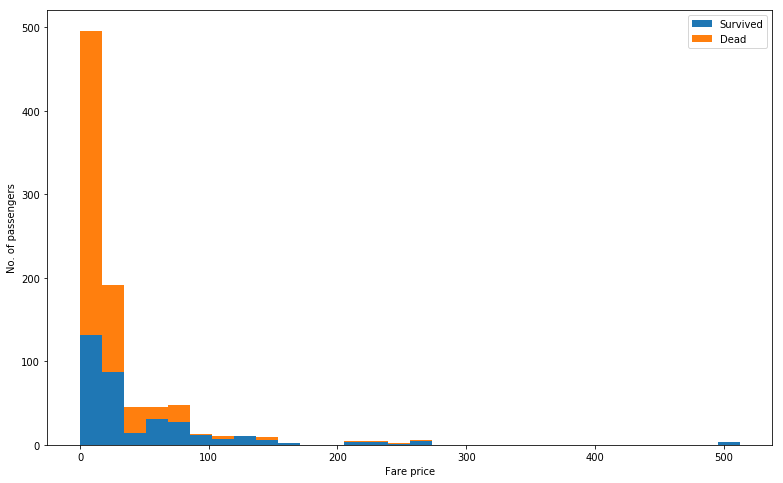

In [13]:
#Fare ticket vs survival -not fare :(
figure = plt.figure(figsize=(13,8))
plt.hist([dataframe[dataframe['Survived']==1]['Fare'],dataframe[dataframe['Survived']==0]['Fare']],
        bins = 30,label=['Survived','Dead'],stacked = True)
plt.xlabel('Fare price')
plt.ylabel('No. of passengers')
plt.legend()

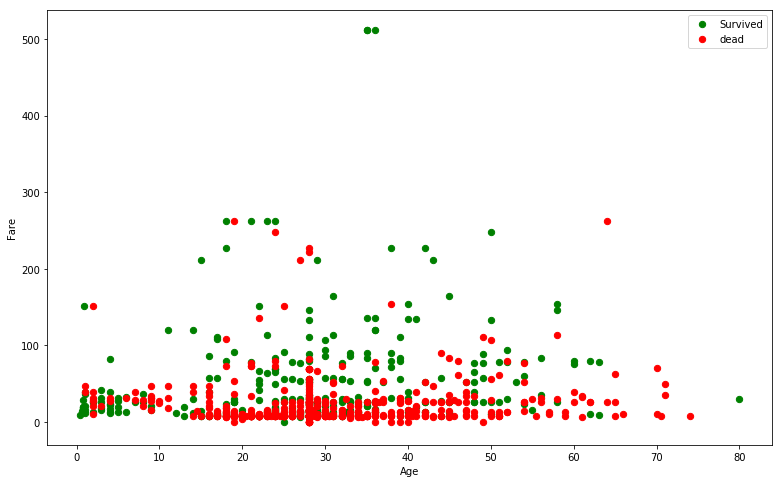

In [7]:
#combine age,fare, survival
plt.figure(figsize=(13,8))
ax = plt.subplot()
ax.scatter(dataframe[dataframe['Survived']==1]['Age'],dataframe[dataframe['Survived']==1]['Fare'], c='g',s=40)
ax.scatter(dataframe[dataframe['Survived']==0]['Age'],dataframe[dataframe['Survived']==0]['Fare'], c='r',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('Survived','dead'))

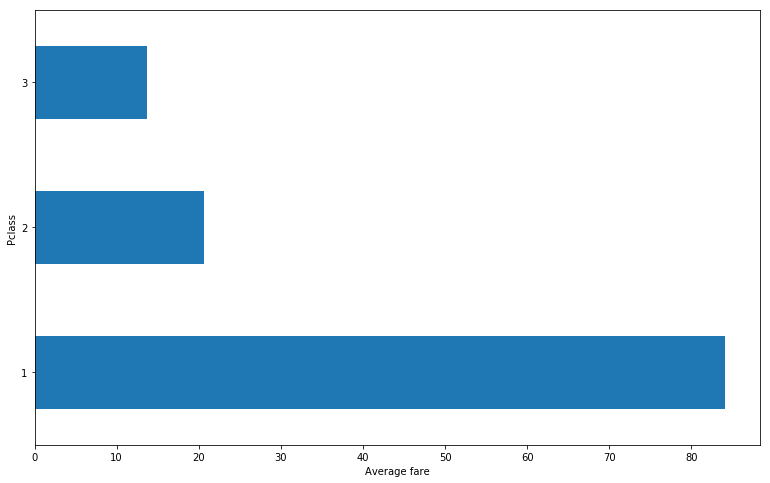

In [8]:
ax = plt.subplot()
ax.set_xlabel('Average fare')
dataframe.groupby('Pclass').mean()['Fare'].plot(kind = 'barh',figsize=(13,8),ax=ax)

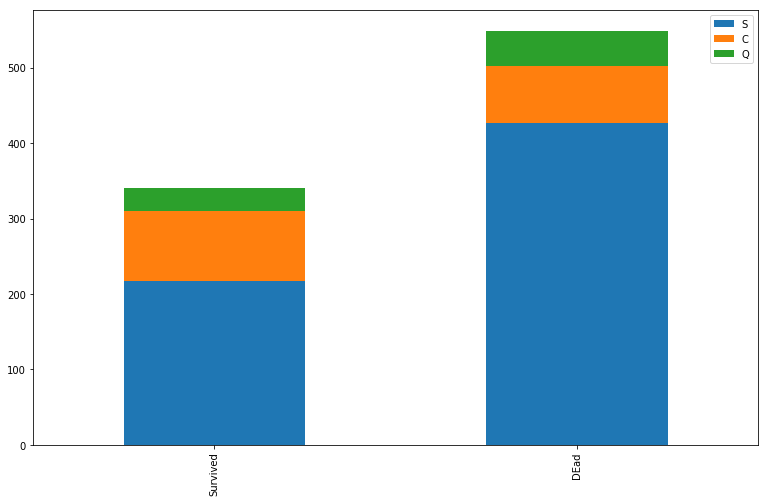

In [9]:
#Embarkation
survived_embark = dataframe[dataframe['Survived']==1]['Embarked'].value_counts()
dead_embark = dataframe[dataframe['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','DEad']
df
df.plot(kind='bar',stacked=True,figsize=(13,8))

In [10]:
#Part2:Feature Engineering
def status(feature):
    print 'processing', feature,':ok'


In [11]:
def get_combined_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    
    print test.shape
    
    print train.shape
    targets=train.Survived
    train.drop('Survived',1,inplace=True)
    
    #merging the test and train data for future
    combined = train.append(test)
    #data frame from which I remove some rows. As a result,a data frame in which index is 
    #something like that: [1,5,6,10,11] is reset to [0,1,2,3,4]
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    return combined

combined = get_combined_data()
combined.shape

    

(418, 11)
(891, 12)


(1309, 11)

In [12]:
#Titles extract and match it with our own values
def get_titles():

    global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
get_titles()
combined.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


In [13]:
combined['Age'].isnull().value_counts()

False    1046
True      263
Name: Age, dtype: int64

In [14]:
#how to fill in the missing value:
grouped = combined.groupby(['Sex','Pclass','Title'])
grouped.mean()

PassengerId        Age     SibSp     Parch        Fare
Sex    Pclass Title                                                          
female 1      Miss      586.887097  30.131148  0.338710  0.500000  127.934544
              Mrs       762.858974  42.926471  0.743590  0.474359   96.955288
              Officer   797.000000  49.000000  0.000000  0.000000   25.929200
              Royalty   874.333333  40.000000  0.333333  0.000000   78.333333
       2      Miss      656.940000  20.717083  0.400000  0.640000   22.571500
              Mrs       610.089286  33.418182  0.589286  0.660714   23.827084
       3      Miss      616.500000  17.360874  0.880000  0.453333   14.375697
              Mrs       655.424242  32.326531  0.590909  1.363636   17.480050
male   1      Master    719.800000   6.984000  0.800000  2.000000  150.056660
              Mr        655.138365  41.450758  0.308176  0.238994   68.260090
              Officer   723.750000  51.090909  0.583333  0.166667   68.477775
              Royalty   484.666667  42.333333  0.333333  0.000000   28.216667
       2      Master    567.181818   2.757273  0.818182  1.272727   27.386745
              Mr        713.633333  32.346715  0.300000  0.113333   19.527443
              Officer   572.800000  40.700000  0.200000  0.200000   17.337500
       3      Master    674.488889   6.090000  2.488889  1.333333   25.443609
              Mr        643.015625  28.318910  0.267857  0.147321   11.103904

In [15]:
#Filling in the nan values of age with each media
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    combined.Age = combined.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('age')
process_age()


processing age :ok


In [16]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [17]:
#Name colunm is dropped and instead title column is used
def process_names():
    
    global combined
    # we clean the Name variable
    combined.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,titles_dummies],axis=1)
    
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)
    
    status('names')
process_names()

processing names :ok


In [18]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [19]:
def process_fares():
    
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.Fare.mean(),inplace=True)
    
    status('fare')
process_fares()

processing fare :ok


In [20]:
#Processing cabin
def process_cabin():
    
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'],prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies],axis=1)
    
    combined.drop('Cabin',axis=1,inplace=True)
    
    status('cabin')
process_cabin()
combined.head()

processing cabin :ok


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title_Master,...,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,S,0,...,0,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,S,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:

#processing embarked
def process_embarked():
    
    global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.Embarked.fillna('S',inplace=True)
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('embarked')
process_embarked()

processing embarked :ok


In [22]:
#processing sex
def process_sex():
    
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    
    status('sex')


process_sex()

processing sex :ok


In [23]:
#Processing Pclass
def process_pclass():
    
    global combined
    # encoding into 3 categories:(note only one column value will be 1 others are 0)
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
    print pclass_dummies
    
    # adding dummy variables
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('pclass')

process_pclass()

      Pclass_1  Pclass_2  Pclass_3
0            0         0         1
1            1         0         0
2            0         0         1
3            1         0         0
4            0         0         1
5            0         0         1
6            1         0         0
7            0         0         1
8            0         0         1
9            0         1         0
10           0         0         1
11           1         0         0
12           0         0         1
13           0         0         1
14           0         0         1
15           0         1         0
16           0         0         1
17           0         1         0
18           0         0         1
19           0         0         1
20           0         1         0
21           0         1         0
22           0         0         1
23           1         0         0
24           0         0         1
25           0         0         1
26           0         0         1
27           1      

In [24]:
#processing ticket
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket',inplace=True,axis=1)

    status('ticket')
process_ticket()

processing ticket :ok


In [25]:
combined.shape
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
#processing family
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)
    
    status('family')
    

process_family()



processing family :ok


In [27]:
combined.shape

(1309, 68)

In [28]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,0,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,...,0,0,0,0,0,1,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0


In [29]:
#Normalize the features
def scale_all_features():
    
    global combined
    
    features = list(combined.columns)
    features.remove('PassengerId')
    combined[features] = combined[features].apply(lambda x: x/x.max(), axis=0)
    
    print 'Features scaled successfully !'
scale_all_features()

Features scaled successfully !


In [30]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1.0,0.2750,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0
1,2,0.0,0.4750,0.125,0.0,0.139136,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,1.0,0.0
2,3,0.0,0.3250,0.000,0.0,0.015469,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,0.0
3,4,0.0,0.4375,0.125,0.0,0.103644,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.181818,0.0,1.0,0.0
4,5,1.0,0.4375,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,1.0,0.0,0.0


In [31]:
#Modeling :)

In [32]:
#imoorting models:

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score



/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [33]:
#5fold cv socring function
def compute_score(clf,X,y,scoring='accuracy'):
    xval = cross_val_score(clf,X,y,cv=5,scoring=scoring)
    return np.mean(xval)
    

In [34]:
#train test  target recovery
def recover_train_test_target():
    global combined
    train0 = pd.read_csv('train.csv')
    targets = train0.Survived
    train = combined.ix[0:890]
    test = combined.ix[891:]
    
    return train,test,targets


In [35]:
train, test, targets = recover_train_test_target()

In [36]:
#feature selection:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)

In [37]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance']= clf.feature_importances_


In [38]:


features.sort(['importance'],ascending=False)



/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,feature,importance
0,PassengerId,0.127757
2,Age,0.120420
5,Fare,0.112714
8,Title_Mr,0.109906
1,Sex,0.108335
26,Pclass_3,0.042814
9,Title_Mrs,0.039001
7,Title_Miss,0.037304
20,Cabin_U,0.029269
64,FamilySize,0.020898


In [39]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(891, 15)

In [40]:
test_new = model.transform(test)
test_new.shape

(418, 15)

In [41]:
#hyperparameters tuning
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': range(200,300,10),
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.833894500561
Best parameters: {'n_estimators': 270, 'criterion': 'gini', 'max_depth': 4}


In [43]:


pipeline = grid_search



In [45]:


output = pipeline.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('output.csv',index=False)

